In [1]:
import base_compnal
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from tqdm import tqdm

In [9]:
N = 30
polynomial_degree = 3
num_sweeps = 10000
num_samples = 1000
T_list = np.arange(0.47, 0.521, 0.004)
val = -1.0/scipy.special.binom(N - 1, polynomial_degree - 1)

In [10]:
interaction = [0 for _ in range(polynomial_degree)]
interaction[polynomial_degree - 1] = val

In [11]:
model = base_compnal.model.PolynomialIsing(N, interaction, base_compnal.Lattice.INFINIT_RANGE)
solver = base_compnal.solver.ClassicalMonteCarlo(model, base_compnal.Updater.METROPOLIS)
solver.set_num_sweeps(num_sweeps)
solver.set_num_samples(num_samples)

In [12]:
mag_list_1000 = []
ene_list_1000 = []
bind = []
for T in tqdm(T_list):
    solver.set_temperature(T)
    solver.run()
    mag_list_1000.append(sum(solver.get_magnetizations())/num_samples)
    ene_list_1000.append(sum(solver.get_energies())/num_samples/N)
    avg_deg2 = solver.calculate_sample_average(2)
    avg_deg4 = solver.calculate_sample_average(4)
    bind.append(1 - avg_deg4/(3*avg_deg2*avg_deg2))

100%|██████████| 13/13 [01:24<00:00,  6.48s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


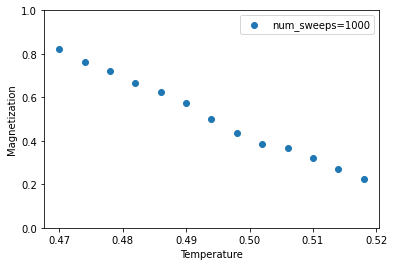

In [6]:
plt.scatter(T_list, mag_list_1000, label="num_sweeps=1000")
plt.ylim(0.0, 1.0)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()
plt.savefig("out.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


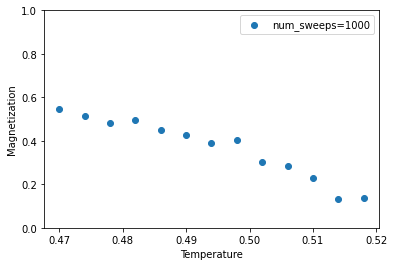

In [13]:
plt.scatter(T_list, bind, label="num_sweeps=1000")
plt.ylim(0.0, 1.0)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()
plt.savefig("out2.eps")

In [14]:
bind2 = [0.612420598138494,
 0.5809692613568471,
 0.5607438892611796,
 0.5278881069254537,
 0.5020757824128671,
 0.4531872862036419,
 0.3885621153785612,
 0.3117997509889817,
 0.23712312469632235,
 0.18990303942890518,
 0.10354577264142106,
 -0.0653206552119654,
 -0.18833834390585702]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


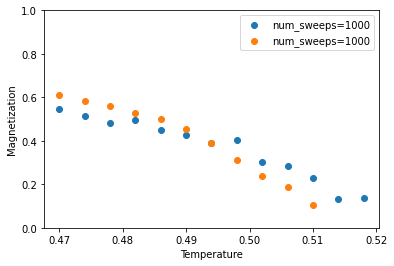

In [15]:
plt.scatter(T_list, bind, label="num_sweeps=1000")
plt.scatter(T_list, bind2, label="num_sweeps=1000")
plt.ylim(0.0, 1.0)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()
plt.savefig("out2.eps")